# CS5228 Assignment 2a - Tree-Based Models (50 Points)

Hello everyone, this assignment notebook covers Tree-Based Models. There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:** 
* Remember to rename and save this Jupyter notebook as **A2a_YourName_YourNUSNETID.ipynb** (e.g., **A2a_BobSmith_e12345678.ipynb**) before submission! Failure to do so will yield a penalty of 1 Point.
* Remember to rename and save the script file **A2a_script.py** as **A2a_YourName_YourNUSNETID.py** (e.g., **A2a_BobSmith_e12345678.py**) before submission! Failure to do so will yield a penalty of 1 Point.
* Submission deadline is Oct 9, 11.59 pm (together with A2b). Late submissions will be penalized by 10% for each additional day.

Please also add your nusnet and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [170]:
student_id = 'A0248326B'
nusnet_id = 'E0925478'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts are there to provide additional explanations, documentation, or some discussion. The code and markdown cells you are a supposed to complete are well marked, but you can use the overview below to double-check that you covered everything.

* **1 Decision Tree (30 Points)**
    * 1.1 Implementing a Decision Tree Regressor (10 Points)
        * 1.1 a) Calculating All Possible Thresholds (2 Points)
        * 1.1 b) Finding the Best Split (4 Points)
        * 1.1 c) Training the Decision Tree Regressor (4 Points)
    * 1.2 Towards Improving `MyDecisionTreeRegressor` (7 Points)
        * 1.2 a) Speeding up the Performance (3 Points)
        * 1.2 b) Supporting Different Feature Types (4 Points)
    * 1.3 Questions about Decision Trees (13 Points)
        * 1.3 a) Decision Trees and Outliers (3 Points)
        * 1.3 b) Manually Playing a Decision Tree Classifier (3 Points)
        * 1.3 c) True/False Questions (7 Points)
* **2 Tree Ensembles (20 Points)**
    * 2.1 Implementing a Random Forest Regressor (8 Points)
        * 2.1 a) Implementing Bagging (2 Points)
        * 2.1 b) Implementing Feature Sampling (2 Points)
        * 2.1 c) Training the Random Forest Regressor (2 Points)
        * 2.1 d) Predicting Output Values (2 Points)
    * 2.2 Implementing a Gradient Boosting Regressor (8 Points)
        * 2.2 a) Training the Gradient-Boosted Regressor (6 Points)
        * 2.2 b) Predicting Output Values (2 Points)
    * 2.3 Questions about Tree Ensembles (4 Points)
        * 2.3 a) Random Forest: Bagging Only vs. Bagging + Feature Sampling (2 Points)
        * 2.3 b) Random Forest: Regression vs. Classification (2 Points)

## Setting up the Notebook

In [171]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Making all the required imports:

In [172]:
import numpy as np
import pandas as pd

# Only used to compare your own implementation :)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `A1b_script.py`, you also need to edit the import statement below accordingly.

In [173]:
from A2a_GanKaiyuan_E0925478 import MyDecisionTreeRegressor, MyRandomForestRegressor, MyGradientBoostingRegressor

----------

## 1 Decision Trees

Decision Trees are a very common classification and regression model on their own, but even more so as the core building block of ensemble models. As such, a solid understanding of Decision Trees -- including their strengths and limitations -- is important to also understand these more advanced ensemble models, like Random Forests or Gradient Boosting Trees.

### 1.1 Implementing a Decision Tree Regressor

In this section, you will implement your own Decision Tree regressor. This will test but also deepen your understanding of the inner workings of Decision Trees. The keep the complexity low, the Decision tree will be simplified compared to the general model you've seen in the lecture:

* Only numerical features are supported
* Only binary splits are supported

(incidentally, this is in line with scitkit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) implementation)

In the file `A2a_script.py`, you can find the skeleton code for the class `MyDecisionTreeRegressor`. Note that many parts of the implementation are given to you. Have a good look at the provided code to understand its different components.

**In the following subtasks, you will complete the methods where indicated by the comments within each method.** No need to worry, we will guide you through the implementation step by step.

#### Calculating the RSS Scores of a Node and a Split (nothing for you to do here!)

Recall from the lecture, that the RSS score of a node is defined as:

$$RSS_{node} = \sum_{i\in R_{node}} (y_i - \mu_{R_{node}})^2$$

where $R_{node}$ is the set of output values of the $node$, and $\mu_{R_{node}}$ is the mean of the values in $R_{node}$.

Analogously, the RSS score of a split is defined as:

$$RSS_{split} = \sum_{k=1}^K\sum_{i\in R_k} (y_i - \mu_{R_k})^2$$

where $K$ is the number of child nodes (here $K=2$ since all splits are binary splits), $R_k$ is the set of output values in child node $k$, and $\mu_{R_k}$ is the mean of the values in $R_k$.

Since these are very basic arithmetic operations, we give you the two methods `calc_rss_score_node` and `calc_rss_score_split` for free. Have a look at both methods to convince yourself that these methods implement the formulas given above. Again, since we consider only binary splits, method `calc_rss_score_split` simplifies to calling `calc_rss_score_node` twice on both child nodes and summing up both scores.

#### 1.1 a) Calculating All Possible Thresholds (2 Points)

We have seen in the lecture that we can split numerical features using thresholds that separate the feature values into all values less or equal to a threshold and larger than the threshold.

**Implement the method `calc_thresholds()`!** In principle, there are different possible approaches. Here, we consider the basic method covered in the lecture, where we derive all thresholds as the values between two adjacent feature values. You can test your implementation using the code cell below; it shows for three different inputs the expected outputs. (Hint: [`np.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) might make life easier.)

In [174]:
values1 = np.array([4, 1, 2, 1, 1, 3])
values2 = np.array([1, 2, 3, 4, 5, 6])
values3 = np.array([8, 0, 0, 1, 0, 0])

my_regressor = MyDecisionTreeRegressor()

# thresholds = my_regressor.calc_thresholds(values1)  # Expected output: [1.5 2.5 3.5]
thresholds = my_regressor.calc_thresholds(values2)  # Expected output: [1.5 2.5 3.5 4.5 5.5]
# thresholds = my_regressor.calc_thresholds(values3)  # Expected output: [0.5 4.5]

print('Thresholds: {}'.format(thresholds))

Thresholds: {1.5, 2.5, 3.5, 4.5, 5.5}


#### Creating a Split (nothing for you to do here!)

We provide you the method `create_split()` to split a list `x` of feature values with respect to a threshold. Note that the method returns not the values themselves but the indices of the values. By giving you this method, we can ensure that everyone should get the exact same result, as well as that the results will match with the Decision Tree implementation of scikit-learn. For example, `create_split()` puts all samples `<=` then the threshold into the left child node (and all others into the right child node). However, there would be no principle difference to put them in the right child node (and all others into the left child node). It's purely a convention to ensure consistency. Again, have a good look at `create_split()` to understand its inputs, inner workings, and output.

#### 1.1 b) Finding the Best Split (4 Points)

Finding the best split is at the heart of training of a Decision Tree. As we saw in the lecture, the best split is defined by which

* feature *and*

* threshold

result in a split of the data samples yielding the best score (here: the split with the lowest RSS score). We already have the methods to calculate the RSS scores of a node and a split, as well as to calculate the thresholds to be considered for a given feature. Finding the best split essentially boils simply down to checking for each feature and all corresponding thresholds to check which split gets the lowest RSS score.

To test your implementation, let's first define a small toy dataset of 20 data samples. The two input features are the `weight` (in kg) and `height` (in cm) of a person, and the output value (i.e., the predicted variable) are the blood sugar level (in mmol/L).

In [175]:
weights = np.array([68, 71, 92, 59, 80, 81, 75, 88, 45, 64, 59, 87, 80, 73, 55, 92, 93, 72, 49, 57])
heights = np.array([175, 175, 170, 168, 184, 184, 167, 155, 152, 163, 190, 161, 160, 174, 159, 183, 165, 181, 179, 154])

X_toy = np.stack((weights, heights), axis=1)
y_toy = np.array([7.8, 7.7, 11.0, 7.9, 6.8, 7.9, 6.3, 9.5, 8.1, 9.0, 6.0, 10.1, 7.0, 7.8, 7.7, 10.2, 9.8, 7.0, 6.4, 7.6])

print('Toy dataset -- #samples: {}, #features: {}'.format(X_toy.shape[0], X_toy.shape[1]))

Toy dataset -- #samples: 20, #features: 2


**Implement method `calc_best_split`** to find the best split with respect to all features and corresponding thresholds. You obviously can and should make use of the existing methods you have implemented or are already provided to you. The skeleton code of method `calc_best_split()` shows you which values need to be returned. Appreciate that those are the values that

* define a split (`best_feature_idx`, `best_threshold`)

* decide whether to split or not (`best_score`)

* recursively built the Decision Tree (`best_split`, which is a tuple containing the left and right child indices)

You can use the code cell below to test your implementation of the method. The following markdown cell shows the expected outcomes. As your implementation of the Decision Tree regressor does not contain any randomness (e.g., through various heuristics to improve performance), your results should match the expected outcome.

In [176]:
my_regressor = MyDecisionTreeRegressor()

score, threshold, feature_idx, split = my_regressor.calc_best_split(X_toy, y_toy)

In [177]:
print("Best feature index:   {} (0=weight, 1=height)".format(feature_idx))
print("Best threshold:       {} (for the best feature)".format(threshold))
print("#samples (left)       {}".format(len(split[0])))
print("#samples (right)      {}".format(len(split[1])))

Best feature index:   0 (0=weight, 1=height)
Best threshold:       84.0 (for the best feature)
#samples (left)       15
#samples (right)      5


The code cell above should yield the following output:
    
```
Best feature index:   0 (0=weight, 1=height)
Best threshold:       84.0 (for the best feature)
#samples (left)       15
#samples (right)      5
```

You can now also compare your implementation with scitkit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) implementation. Since we are only interested in the first split here -- that is, we are only interested in the root node and its two children -- we can set `max_depth=1`.

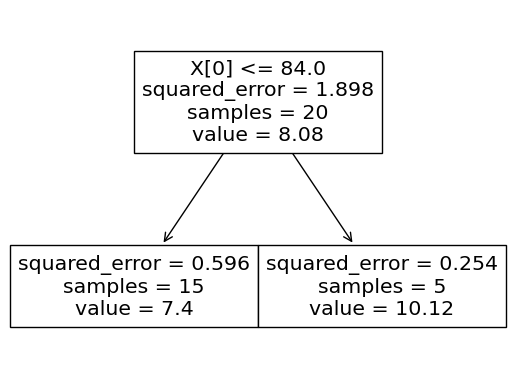

In [178]:
sk_regressor = DecisionTreeRegressor(max_depth=1).fit(X_toy, y_toy)

plt.figure()
tree.plot_tree(sk_regressor)
plt.show()

The information in the box for the root node reflects the feature index and threshold for the best split; the boxes for the two child nodes show you the number of samples in both children. Of course, all that information should match your results from above.

#### 1.1 c) Training the Decision Tree Regressor (4 Points)

With all the methods for scoring and splitting nodes in place, we can now train our Decision Tree. To this end, let's first load a small dataset. We use the [Hitters](https://www.kaggle.com/floser/hitters) dataset which aims to predict the salaries of baseball players based on their statistics. You can check the website for more details about the different features. In the following, we just consider a subset of all features to keep it simple.

In [179]:
subset = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Years', 'Assists', 'Errors']

df = pd.read_csv('data/a2-hitters.csv')
df = df.dropna(subset=subset+['Salary']) # We ignore all samples with NA values; it's not important here

X = df[subset].to_numpy()
y = df[['Salary']].to_numpy().squeeze()

# Note: sklearn.model_selection.train_test_split also shuffles the data!
# So we need to set random_state to ensure consistent results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Size of training set: {}".format(len(X_train)))
print("Size of test: {}".format(len(X_test)))

Size of training set: 210
Size of test: 53


Have a good look at methods `fit()` and `_fit()` and get a good understanding! They basically contain all the code required for recursively splitting nodes. So you don't have to worry about that. The only things missing from the `_fit()` method are the conditions for when to stop the recursion. Some conditions can be checked before calculating the best split, some afterwards (cf. lecture slides, including the ones to avoid overfitting).

**Implement all possible conditions to stop the recursion in method `_fit()`, and try to do them as early as possible!** Each condition will be a simple `IF` statement that will `return` if true. (Hint: The 2 parameters `max_depth` and `min_samples_split` are adopted from scikit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html); only exception: `min_samples_split` is only interpreted as *int*, scitkit-learn also has a separate interpretation if `min_sample_split` is a *float*))

In [180]:
print('Compare node counts for different values of max_depth')
for max_depth in [1, 3, 5]:
    my_regressor = MyDecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    sk_regressor = DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    print('{} vs {}'.format(sk_regressor.tree_.node_count, my_regressor.get_node_count()))

print('\nCompare node counts for different values of min_samples_split')
for min_samples_split in [10, 20, 30]:
    my_regressor = MyDecisionTreeRegressor(min_samples_split=min_samples_split).fit(X_train, y_train)
    sk_regressor = DecisionTreeRegressor(min_samples_split=min_samples_split).fit(X_train, y_train)
    print('{} vs {}'.format(sk_regressor.tree_.node_count, my_regressor.get_node_count()))

Compare node counts for different values of max_depth
3 vs 3
13 vs 13
41 vs 41

Compare node counts for different values of min_samples_split
99 vs 99
41 vs 41
31 vs 31


Of course, the pairs of node counts should always match. (Hint: In case of (small) discrepancies, you first might want to check the stop conditions in the `_fit()` method. Simply a `<` instead of a `<=` can change the outcome. You can consult with the documentation of scikit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) to identify the correct conditions)

#### Predicting Output Values (nothing for you to do here!)

With the code for training the Decision Tree, the code for predicting output values is very straightforward. We therefore provide you with the methods `predict()` and `predict_sample()` with the former simply calling the latter for each given sample. The prediction of a single sample has to consider only two cases: (a) if the current node is not a leaf, we need to decide whether to recursively check the left or the right child node; (b) if the current node is a leaf, the predicted value is simply the mean of values in the node. Have a good look at `predict_sample()` to convince yourself that this method implements these two cases.

With the implementation of `MyDecisionTreeRegressor` complete, you can now compare your implementation with the one from scikit-learn in terms of the prediction values. The code cell below trains two Decision Trees, one using your implementation and the one from scikit-learn. Feel free to modify the values of `max_depth` and `min_samples_split`. For comparison, we print the predicted values of the first five samples in the test set `X_test` derived from both decision trees.

In [181]:
max_depth = 3
min_samples_split = 30

my_regressor = MyDecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split).fit(X_train, y_train)
sk_regressor = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split).fit(X_train, y_train)

# Let's compare the first 5 predicted values
print(my_regressor.predict(X_test)[:5])
print(sk_regressor.predict(X_test)[:5])

[306.36363636 493.83335556 306.36363636 493.83335556 138.54255319]
[306.36363636 493.83335556 306.36363636 493.83335556 138.54255319]


If you get identical predictions from both Decision Trees (and different values for `max_depth` and `min_samples_split`), your implementation should be correct.

### 1.2 Towards Improving `MyDecisionTreeRegressor` (7 Points)

While your Decision Tree works alright on a small real-world dataset, it is only a basic implementation and naturally has its limitations. This part looks into two of these limitations, as well as potential solutions to address them. (**Note:** There will be no need for any implementation!)

**1.2 a) Speeding up the Performance (3 Points)** 

If we would use a larger dataset for training a regressor, scikit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) would vastly outperform your implementation of `MyDecisionTreeRegressor` in terms of runtime. Of course, this should not be a surprise as scikit-learn is a highly optimized package -- and we focus here on understanding the basic concepts. 

**Identify the cause(s) of the poor runtime in the code of `MyDecisionTree` and propose suitable optimizations!** You can speculate as long as you can make good arguments. Your solutions may include heuristics that do not necessarily guarantee the exact same results as the current implementation.

**Important:** Ignore approaches such as parallelization or simply running the algorithm on big computing clusters :). Focus on principle tweaks of the implementation of your Decision Tree regressor.

**Your Answer:**
- Whenever calling the function ``_fit()``, we have to calculate the rss score. And the time complexity of this calculation is O(N) where N denotes the number of samples of this node. Therefore, when using a large dataset, this overhead would grow vastly and greatly increase the runtime.
- Whenever calling the function ``_fit()``, we have to compute the best split by find best feature to split and best threshold in nested loop which greatly increase the runtime is the dataset becomes larger and larger.

#### 1.2 b) Supporting Different Feature Types (4 Points)

`MyDecisionTreeRegressor` only supports numerical features. However, we saw in the lecture that Decision Trees in general work perfectly fine with categorical features; the slides included examples of splitting and scoring nominal and ordinal features. The problem is that the methods for splitting depend on the type of a feature, and the Decision Tree regressor does not *know* which type each feature is. A "manual" solution would be to explicitly specify the type of each features, for example like

`regressor.fit(X_train, y_train, feature_types=[RATIO, RATIO, NOMINAL, RATIO, ORDINAL, INTERVAL])`

assuming that `X_train` has 6 features; see Lecture 1 for the 4 different feature types. However, such manual specification can be very tedious particularly when the feature set frequently changes during extensive evaluations.

**Propose an algorithm (in pseudo code) to automatically identify the type of a feature!** Your algorithm won't be foolproof and 100% correct in all cases -- if such a perfect algorithm for this task would exist it would already be commonplace. However, try to identify meaningful rules or heuristics to identify the type of a feature, but also discuss any cases that can NOT be solved, at least in practice. (Hint: Approach this problem as if you were given a dataset without any documentation and even without the names of features -- that is, you only know the data type and values of the features.)

**Your Answer:**

```
Input: Feature X
Output: Type of Feature X

if X contains non digit value:
    if X can not be ordered:
        return Nomninal
    else:
        return Ordinal
else:
    if X contains value 0:
        return Interval
    else:
        return Ratio
```

### 1.3 Questions about Decision Trees (13 Points)

#### 1.3 a) Decision Trees and Outliers (3 Points)

Have another look at your implementation of `MyDecisionTreeRegressor` to answer/discuss the following questions:

* In what way do outliers affect the training of Decision Tree regressors and subsequent predictions?
* How do these effects compare to Decision Tree classifiers (i.e., instead of Decision Tree regressors)?
* How could Decision Trees be improved to (better) handle outliers, and what are possible downsides?

These questions are closely related, so we combined them into a single task.

**Your Answer:**
1. Outliers might cause Decision Tree over-fitting thus reduce the prediction accuracy.
2. Decision Tree classifiers might misclassify the sample totally while Regressors might have larger errors (residual) between prediction and ground truth.
3. Decision Tree can implement Pruning Strategy to handle outliers. The possible downsides would be hard to define the balance point. If we remove too much branches from the decision tree, the model can not predict accurately. But if we remove too few branches from the decision tree the model might be overfitting.

#### 1.3 b) Manually Playing a Decision Tree Classifier (3 Points)

The plot below shows a toy dataset of 100 data points for a binary classification task. Each data point belongs either to Class Red (big dots) or Blue (small dots); the different dot sizes are only there to accommodate color-blind students, if needed.

<img src="data/a2-toy-data.png">

Now imagine you train a full Decision Tree by running `sklearn.tree.DecisionTreeClassifier` over this dataset without any early stopping, pruning, etc. Note that this implementation of a Decision Tree performs only binary splits.

**How many nodes (both internal and leaf nodes) will the Decision Tree have? (3 Points)** Briefly explain how you derived this number!

**Your Answer:**
There are totally 27 nodes in the Decision Tree. Firstly, I split by the column index and this will generate 10 nodes. Further, I split each node contained both red and blue nodes by row index and this will generate 16 nodes (column 3,4 generate 3 each while column 0,6,7,8,9 generate 2 each). Add by adding the root, there will be totally 27 nodes.

#### 1.3 c) True/False Questions (7 Points)

In the table below are 7 statement that are either *True* or *False*. Complete the table to specify whether a statement is *True* or *False*, and provide a brief explanation for your answer (Your explanation is more important than a simple True/False answer)

**Your Answer:**

This is a markdown cell. Please fill in your answers for (1)~(7).

| No. | Question                                                                                                   | Answer | Brief Explanation                                                                           |
|-----|------------------------------------------------------------------------------------------------------------|--------|---------------------------------------------------------------------------------------------|
| (1)  | Nonlinear relationships between parameters do not affect tree performance. | True   | Each parameter is considered independently.                                                 |
| (2)  | When you train a Decision Tree, you can always a achieve a prediction accuracy of 100% over the *training data*. | True   | When every leaf node contains one sample, it will have 100% accuracy.                       |
| (3)  | The decision tree learning algorithm always finds an optimal decision tree, i.e., one that minimizes the number of questions needed to classify a case. | False  | Decision Tree bases on a greedy algorithm which might not converage to an optimal solution. |
| (4)  | The performance of a Decision Tree classifier or regressors generally benefits from normalization/standardization of the input data. | False  | When creating threshold, the only factor is order, not absolute value.                      |
| (5)  | Small variations in the input data can yield very different Decision Trees.  | True   | Because the error in the upper layer will propogate down to the low-level nodes.            |
| (6)  | If $N$ is the number of data samples in the training data, the total number of nodes in the tree trained by `MyDecisionTreeRegressor` is in $O(2N)$ | True   | Every split only divide one sample out of the parent node.                                  |
| (7)  | A Decision Tree regressor is generally a good choice for extrapolating to unknown data. | True   | Unknown data will always be classified into oen leaf node.                                  |

---

## 2 Tree Ensembles (20 Points)

With the implementation of a Decision Tree regressor in place, the goal of this task now is to show that the extension to ensemble models  like Random Forests and Gradient Boosting Trees is rather straightforward one. In the following you will implement

* a Random Forest regressor *and*
* a Gradient Boosting Tree regressor

For both implementations you can directly adopt the algorithms covered in the lecture. Once you have completed this task, we hope that you see even more advanced models no longer as a scary black box :).

### 2.1. Implementing a Random Forest Regressor (8 Points)

We saw that a Random Forest trains a whole set of Decision Trees in parallel. To yield different Decision Trees each time, two sampling strategies are performed:

* **Bootstrap Sampling:** randomly sample N data points with replacement (N = total number of data points); *and*

* **Feature Sampling:** randomly choose only a subset of features to be used for training and prediction.

**2.1 a) Implement method `bootstrap_sampling()` to generate a bootstrap sample for a given dataset! (2 Points)** The input is represented by feature array `X`, and target array `y` containing the output values. You can use the code cell below to test your implementation. The cell computes five bootstrap samples and prints the shapes of data matrix `X_bootstrap` and output values vector `y_bootstrap`, as well as the vector of the first five samples output values.

**Important:** Avoid using loops in the parts of the codes you have to complete. As usual, let NumPy be your friend :). If you use loops but the results are correct, there will be some minor deduction of points.

In [182]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(0)

my_random_forest = MyRandomForestRegressor()

for _ in range(5):
    X_bootstrap, y_bootstrap = my_random_forest.bootstrap_sampling(X_toy, y_toy)
    print(X_bootstrap.shape, y_bootstrap.shape, y_bootstrap[:10])

(20, 2) (20,) [ 7.  10.2  7.8  7.9  7.9  9.5  9.   7.6  6.4  6.8]
(20, 2) (20,) [ 9.   7.6  9.8  7.6  7.9 10.2 10.2  7.8  6.4  7.9]
(20, 2) (20,) [ 6.   7.9 10.1  6.4 11.   7.8  7.8  6.8  7.9  6.3]
(20, 2) (20,) [ 7.9  6.3 10.1  7.7  6.4  7.8  7.7  7.9  7.   6. ]
(20, 2) (20,) [10.2  7.9 10.2  7.8  9.8  7.   7.9  9.   7.9  7.8]


The expected output is as follows:

```
(20, 2) (20,) [ 7.  10.2  7.8  7.9  7.9  9.5  9.   7.6  6.4  6.8]
(20, 2) (20,) [ 9.   7.6  9.8  7.6  7.9 10.2 10.2  7.8  6.4  7.9]
(20, 2) (20,) [ 6.   7.9 10.1  6.4 11.   7.8  7.8  6.8  7.9  6.3]
(20, 2) (20,) [ 7.9  6.3 10.1  7.7  6.4  7.8  7.7  7.9  7.   6. ]
(20, 2) (20,) [10.2  7.9 10.2  7.8  9.8  7.   7.9  9.   7.9  7.8]
```

Most importantly, the size of each bootstrap sample should reflect the size of the original dataset -- that is, each bootstrap sample needs to contain 20 data samples, each with two features for the toy dataset (weight and height).

**2.1 b) Implement method `feature_sampling()`! (2 Points)** The input is a feature array `X`; to specify the number of features we use a simple approach where `max_features` specifies the ratio of features to be considered. Apart from the new dataset `X_sample` the method also returns the indices of the selected features; you will need this information when implementing the `fit()` method for training the Random Forest.

Have a look at the `__init__()` method; note that `MyRandomForestRegressor` already supports the `max_features` parameter we is aligned with the [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) from scikit-learn. For the implementation of `feature_sampling()`, however, we keep it simple, and consider `max_features` as a *float* values between 0 and 1, reflecting the ratio of features to included in the sample. For example, if `max_features=0.4`, only 40% of all features are part of the sample. If this number is not an integer, please always round up (Hint: [`np.ceil`](https://numpy.org/doc/stable/reference/generated/numpy.ceil.html)).

You can use the code cell below to test your implementation. Since the toy dataset has only 2 features, feature sampling with `max_features=0.5` and lower will return only one feature.

**Important:** Avoid using loops in the parts of the codes you have to complete. If you use loops but the results are correct, there will be some minor deduction of points.

In [183]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(0)

my_random_forest = MyRandomForestRegressor(max_features=0.5)

for _ in range(5):
    X_sample, indices_sampled = my_random_forest.feature_sampling(X_toy)
    print(X_sample.shape, indices_sampled)

(20, 1) [1]
(20, 1) [0]
(20, 1) [0]
(20, 1) [1]
(20, 1) [0]


The expected output is as follows:

```
(20, 1) [1]
(20, 1) [0]
(20, 1) [0]
(20, 1) [1]
(20, 1) [0]
```

Since we round up, the result will also be the same for, say `max_features=0.00001`. If you set `max_fetures` to a value larger than 0.5, all two features will be selected and each line in the output should be `(20, 2) [0 1]` or `(20, 2) [1 0]`. Values for `max_features` less or equal to `0`  or larger than `1.0` are of course invalid. But you do not need to make any checks in your implementation!

#### 2.1 c) Training the Random Forest (2 Points)

With **Bootstrap Sampling (Bagging)** and **Feature Sampling** -- and of course the implementation of your Decision Tree regressor -- everything is in place to finally train the Random Forest. As we saw in the lecture, training a Random Forest is simply training multiple Decision Trees based on different sampled datasets.

**Implement method `fit()` to train the Random Forest!** Have a good look at the given code snippet, and note that you need to keep track of the tuple `(regressor, indices_sampled)` for each estimator (i.e., Decision Tree). You will need `indices_sampled` later when making predictions, as you can only predict using those features that were also used during the training of a particular regressor.

You can use the code cell below to test your implementation.

**Important:** Avoid using loops in the parts of the codes you have to complete. If you use loops but the results are correct, there will be some minor deduction of points.

In [184]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(1)

my_random_forest = MyRandomForestRegressor(n_estimators=100, max_features=0.5).fit(X_toy, y_toy)

for i in range(5):
    print(my_random_forest.estimators[i][0].predict(np.array([[73, 180], [90, 170]])))

[8.1 8.1]
[7.8 9.5]
[7.8 9.5]
[8.1 8.1]
[7.8 9.5]


The expected output is as follows:

```
[8.1 8.1]
[7.8 9.5]
[7.8 9.5]
[8.1 8.1]
[7.8 9.5]
```

#### 2.1 d) Predicting the Output Values (2 Points)

With a trained Random Forest, all that's left is to predict the output values for new data points. We do this by using each estimator (i.e., Decision Tree) to predict the value, and then calculate the average over predictions. Again, since we can only use those features with which an individual Decision Tree was trained on, you need to information about `indices_sampled` here (cf. `fit()` method).

**Implement method `predict()` to predict the output values for new data points! (2 Points)** The input is represented by a feature array `X` containing all new data points. If `X` contains N data points, the result should be an array containing all N predictions.

You can use the code cell below to test your implementation.

**Important:** Avoid using loops in the parts of the codes you have to complete. If you use loops but the results are correct, there will be some minor deduction of points.

In [185]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(1)

my_random_forest = MyRandomForestRegressor(n_estimators=100, max_features=1.0).fit(X_toy, y_toy)

print(my_random_forest.predict(np.array([[73, 180], [90, 170]])))

[ 6.995 10.435]


The expected output is as follows:

```
[ 6.995 10.435]
```

#### Additional Tests (nothing for you to do here!)

You have now implemented your Random Forest regressor. This means that you can now also compare your implementation with the one from scikit-learn. Due to the random sampling, it is basically not possible to ensure the same results. Although we `np.random.seed()` your implementation and the one from scikit-learn are just different for that to matter. To lower the effect of randomization let "switch off" feature sampling by always using all features (`max_features=1.0`).

Try different values for `n_estimators`. You should see that the more estimators you use the more similar the results. This shouldn't be surprising as we make the predictions as the means over a larger set of individual predictions from the estimators. Just don't go too high as your implementation is far from optimized :).


In [186]:
%%time

# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(1)

n_estimators = 100

my_random_forest = MyRandomForestRegressor(n_estimators=n_estimators, max_features=1.0).fit(X_train, y_train)
sk_random_forest = RandomForestRegressor(n_estimators=n_estimators, max_features=1.0).fit(X_train, y_train)

print(my_random_forest.predict(X_test)[:5])
print(sk_random_forest.predict(X_test)[:5])
print()

[312.67143 560.75831 285.995   550.56497 343.265  ]
[292.24643 560.37498 299.13    550.5833  309.775  ]

CPU times: user 28.1 s, sys: 153 ms, total: 28.3 s
Wall time: 30.2 s


For `n_estimators = 100`, the expected output is as follows:

```
[ 6.995 10.435]
```

```
[312.67143 560.75831 285.995   550.56497 343.265  ]
[292.24643 560.37498 299.13    550.5833  309.775  ]
```

### 2.2 Implementing a Gradient Boosting Regressor (8 Points)

As you saw in the lecture, the basic idea of Gradient Boosting is to sequentially train a series of Weak Learners (like Decision Stumps or, more generally, "flat" Decision Trees). Each Weak Learner aims to improve on the error of the preceding learners, where the error derives from the residuals, i.e., the difference between true values and the current predictions. In the lecture, we walked through a complete example of training a Gradient-Boosted Tree regressor. You can and should use this example as a guide for your implementation.

#### 2.2 a) Training the Gradient-Boosted Regressor (6 Points)

**Implement method `fit()` for `MyGradientBoostingRegressor`**! We already provide you with the loop that reflects the sequential training of `n_estimators` (we use the same naming as `sklearn` for convenience). Of course, this method will rely on your implementation of `MyDecisionStumpRegressor` to train each Weak Learner. 

**Important:** If you think your implementation `MyDecisionStumpRegressor` is buggy, you can also use the `sklearn.tree.DecisionTreeRegressor` implementation. However, it should be more satisfying if the Gradient Boosting Regressor is powered by your own implementation of the estimators :).

You can use the code cell below to test your implementation. It uses the same debug dataset as above (predicting people's blood sugar levels based on their height and weight). But note that the predicted values *do not* represent blood sugar levels! Remind yourself why this is the case! The code cell prints the predictions for the first five estimators (i.e., the Decision Trees/Stumps). This means that `n_estimators` must be larger than 5 (default: 100), otherwise there will be an error.

In [187]:
my_gradient_boosted_regressor = MyGradientBoostingRegressor().fit(X_toy, y_toy)

for i in range(5):
    print(my_gradient_boosted_regressor.estimators[i].predict(np.array([[73, 180], [90, 170]])))

[-1.53  2.92]
[-1.377  2.628]
[-0.64146667  2.3652    ]
[-0.59265333  2.12868   ]
[-1.04255342  1.915812  ]


The expected output is as follows:

```
[-1.53  2.92]
[-1.377  2.628]
[-0.64146667  2.3652    ]
[-0.59265333  2.12868   ]
[-1.04255342  1.915812  ]
```

**Side note:** Since `MyGradientBoostingRegressor` uses your implementation of `MyDecisionStumpRegressor` the exact numbers may slightly differ; however, the result should match if the results for `MyDecisionStumpRegressor` matched all the expected outputs in Section 1.

As an additional check, we can also run scikit-learn's `GradientBoostingRegressor` implementation. Note that the access to the individual estimators (i.e., the Decision Trees/Stumps) is a bit different compared to `MyGradientBoostedRegressor`. The result, however, should be the same.

#### 2.2 b) Predicting the Output Values (2 Points)

After the training, the list variable `self.estimators` of `MyGradientBoostingRegressor` will contain all `n_estimators` Weak Learners. In other words, for `n_estimators=100`, the `self.estimators` will contain 100 Decision Trees. How to use this information to predict values we have also seen in the lecture, and is pretty straightforward.

**Implement method `predict()` for `MyGradientBoostedRegressor`!** You can use the code cell below to check your implementation. It shows the predicted blood sugar levels for two arbitrary (weight, height) data samples.

In [188]:
my_gradient_boosted_regressor = MyGradientBoostingRegressor().fit(X_toy, y_toy)

# POSSIBLE prediction: [ 7.17510776 10.40044752]
print(my_gradient_boosted_regressor.predict(np.array([[73, 180], [90, 170]])))

[ 6.98687497 10.9907631 ]


The expected output you should see is:

```
[ 6.98687497 10.9907631 ]
```

#### Additional Tests (nothing for you to do here!)

Lastly, you can try your implementation using a simplified version of the [Hitters](https://www.kaggle.com/floser/hitters) datasets as above. Here, you can directly compare your implementation with `sklearn.ensemble. GradientBoostingRegressor`. Observe that the default parameters of `MyGradientBoostedRegressor` match the one of `sklearn.ensemble. GradientBoostingRegressor`. This means we can simply create both regressors with the default parameters to expect the same results. Feel free to change `n_estimators`, `max_depth`, or `min_samples_split` for both regressors and you should still see identical results.

In [189]:
%%time

my_gradient_boosted_regressor = MyGradientBoostingRegressor().fit(X_train, y_train)
sk_gradient_boosted_regressor = GradientBoostingRegressor().fit(X_train, y_train)

print(my_gradient_boosted_regressor.predict(X_test)[:5])
print(sk_gradient_boosted_regressor.predict(X_test)[:5])

[202.06077245 432.99884395 328.71060245 592.71468247 192.76818788]
[202.06077245 452.7587573  328.71060245 592.71468247 192.76818788]
CPU times: user 8.83 s, sys: 13.8 ms, total: 8.85 s
Wall time: 8.84 s


In case of the default parameters for the regressors, the output should look like:

```
[202.06077245 432.99884395 328.71060245 592.71468247 192.76818788]
[202.06077245 470.24977627 328.71060245 592.71468247 192.76818788]
```

Again, the exact values might slightly differ between the 2 implementations. By the way, running the code cell above might take a couple of seconds, and this is not due to the `sklearn.ensemble.GradientBoostingRegressor` implementation :). All methods and algorithms of `sklearn` are highly optimized, and we simply cannot compete with that. The focus of this assignment and module in general is on the understanding of the data mining algorithms.

### 2.3 Questions about Tree Ensembles (4 Points)

#### 2.3 a) Random Forest: Bagging Only vs. Bagging + Feature Sampling (2 Points)

The code cell below trains a two series of 20 Decision Trees each. One series uses only Bagging (i.e., Bootstrap Sampling) for the training data; the other series uses both Bagging and Feature Sampling. The output shows the results for "Bagging only" in the left column and "Bagging + Feature Sampling" in the right column. `root index` represents the feature index chosen as the root node (i.e., for the first split); `#nodes` represents the total number of nodes in the trained Decision Tree.

**Note:** There is nothing for you to implement here, but feel free to increase the number of Decision Trees beyond 20.

In [190]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(10)

my_random_forest_bagging = MyRandomForestRegressor(max_features=1.0)
my_random_forest_sampling = MyRandomForestRegressor(max_features=0.2)

print("Bagging only\t\t\t\tBagging + Feature Sampling")
for _ in range(20):
    # Create a new bootstrap sample
    X_t, y_t = my_random_forest_bagging.bootstrap_sampling(X_train, y_train)
    regressor_bagging = DecisionTreeRegressor().fit(X_t, y_t)
    
    X_t, indices_sampled = my_random_forest_sampling.feature_sampling(X_t)
    regressor_sampling = DecisionTreeRegressor().fit(X_t, y_t)    
    
    # Print core features of trained Decision Tree
    # (feature index of root node, total of number of nodes in Decision Tree)
    print('#root index: {},  #nodes: {}\t\t#root index: {},  #nodes: {}'
          .format(regressor_bagging.tree_.feature[0], regressor_bagging.tree_.node_count,
                  indices_sampled[regressor_sampling.tree_.feature[0]], regressor_sampling.tree_.node_count))

Bagging only				Bagging + Feature Sampling
#root index: 1,  #nodes: 259		#root index: 1,  #nodes: 263
#root index: 4,  #nodes: 253		#root index: 0,  #nodes: 263
#root index: 1,  #nodes: 245		#root index: 2,  #nodes: 231
#root index: 5,  #nodes: 251		#root index: 2,  #nodes: 239
#root index: 1,  #nodes: 247		#root index: 5,  #nodes: 231
#root index: 4,  #nodes: 243		#root index: 1,  #nodes: 257
#root index: 5,  #nodes: 241		#root index: 1,  #nodes: 249
#root index: 0,  #nodes: 249		#root index: 5,  #nodes: 249
#root index: 1,  #nodes: 259		#root index: 1,  #nodes: 269
#root index: 5,  #nodes: 231		#root index: 0,  #nodes: 243
#root index: 5,  #nodes: 273		#root index: 5,  #nodes: 235
#root index: 5,  #nodes: 255		#root index: 5,  #nodes: 249
#root index: 1,  #nodes: 231		#root index: 2,  #nodes: 237
#root index: 1,  #nodes: 263		#root index: 1,  #nodes: 271
#root index: 5,  #nodes: 253		#root index: 5,  #nodes: 259
#root index: 1,  #nodes: 261		#root index: 1,  #nodes: 279
#root index: 

**Interpret the result!** Comparing the resulting series of Decision Trees when using **Bagging only** and **Bagging + Feature Sampling**, what differences and noteworthy details can you observe and what insights into the dataset can you gain from your observations. List all your observations together with a brief explanation!

(It might be useful to remember that the size of `X_train` is 210 data samples with 8 features; note also that each [`sklearn.tree.DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) has been trained with their default parameters)

**Your Answer:**

- **Bagging Only** reveals high frequency of strong predictors like feature_5 while **Bagging + Feature Sampling** distributed more evenly with feature 0,1,2,4,5. The reason behind is that feature sample generates feature randomly so when strong predictor is dropped at the beginning, it will select other feature at the top of Decision Tree.

#### 2.3 b) Random Forest: Regression vs. Classification (2 Points)

The markdown cell below shows a screenshot showing similar results as you have seen in 2.3 a). The only difference here is that these results stem from a classification task (and not a regression task). More specifically, the simple [IRIS](https://archive.ics.uci.edu/ml/datasets/iris) dataset was: it's small and clean, and has only numerical features. The dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant described by 4 features. This means that each Decision Tree has been trained with 150 data samples.

<img src="data/a2-rf-regression-vs-classification.png">

**Interpret the result!** Again, what differences and noteworthy details can you observe and what insights into the dataset can you gain from your observations. Particularly, compare these results with the results from the regression task in 2.3 a). List all your observations together with a brief explanation!

(As in 2.3 a) each [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) has been trained with their default parameters)


**Your Answer:**
- **Bagging Only** show that the feature in root node is always 2 or 3 but **Bagging + Feature Sampling** contains 0,2,3. Because **Bagging Only** prefers to use the strong prediction at the beginning of splitting.
- The total number of nodes in **Bagging Only** is always smaller than **Bagging + Feature Sampling**. Because **Bagging Only** always use the strong prediction so that it generates fewer nodes than **Bagging + Feature Sampling**.
- Classification generates fewer nodes than regression. Because it does not have to generate threshold on continuous feature.